# Plot Script

The 02 script has become a little heavy, since it has to read a lot of data before it actually works. Here is a shorter version, very light, to generate the plot more easily.

## Imports

In [1]:
import pickle

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec

## Data loading

### Hogenbirk et al.

In [3]:
X = pickle.load(open('X.pickle', 'rb'))

In [4]:
x_er_0_rec = pickle.load(open('X_rec.pickle', 'rb'))

In [5]:
Y = pickle.load(open('Y.pickle', 'rb'))

### ASCII Y

In [19]:
fn = '/home/erik/win/notes/fig9_data.txt'
with open(fn, 'w') as f:
    dsets = ['ER 0.5 kV/cm', 'NR 0.5 kV/cm', 'ER 0.1 kV/cm', 'NR 0.1 kV/cm', 'ER 0 kV/cm']
    labels = ['e', 'de']

    for par in ['t3', 'fs', 't1']:
        labels.append(par)
        labels.append('d' + par + '+')
        labels.append('d' + par + '-')

    for y, dset in zip(Y, dsets):
        f.write(dset + '\n')
        f.write(''.join([l + '\t' for l in labels]) + '\n')
        for i, ding in y.iterrows():
            f.write(''.join(['%.3f\t' % (ding[par]) for par in labels]) + '\n')
        f.write('\n')

### Akimov

In [6]:
# Akimov ER
asim_x = [13.5 + 3 * x for x in range(9)]
asim_dx = [1.5 for x in range(9)]
asim_y = np.array([29.1, 30.8, 30.8, 31.85, 32.5, 32.9, 33.0, 34.15, 34.05])
asim_dy = np.array([1.3, 1.2, 1.2,1.3,1.2,1.2,1.1,1.2,1.2]) * 0.5

### Ueshima

In [7]:
# Ues NR
uesnr_x  = np.array([6, 8.3, 10.7, 13.2, 16.7])
uesnr_dx = np.array([1.2,1.2,1.2, 1.2, 2.4])
uesnr_y =  np.array([24.7, 24.4, 23.3, 22.2, 21.6])
uesnr_dy = np.array([0.5, 0.4, 0.6, 0.2, 0.55])

In [8]:
ueser_x  = np.array([6, 8.3, 10.7, 13.2, 16.7])
ueser_dx = np.array([1.2,1.2,1.2, 1.2, 2.4])
ueser_y  = np.array([33.05,34.25,33.8,35.7,35.0])
ueser_dy  = np.array([0.5,1.2,0.35,0.65,1.1])

### Stinking lux

In [9]:
def get_parameter_range(bestfit, stat, syst1, syst2):
    minvalue = (bestfit - stat)*(1-np.sqrt((0.01 * syst1)**2 + (0.01 * syst2[0])**2))
    maxvalue = (bestfit + stat)*(1+np.sqrt((0.01 * syst1)**2 + (0.01 * syst2[1])**2))
    return minvalue, bestfit, maxvalue

In [10]:
def c1c3_to_fs(value):
    return value / (1 + value)

In [11]:
def draw_lux_full(axis, band, parameter, bestfit, stat, syst1, syst2):
    lux_style = dict(color = 'red', alpha = 0.5)
    lux_style_noopt = dict(color = 'red', alpha = 0.25)
    lux_line = dict(color='red')

    if band == 'er':
        e_bounds = (lux_er_e_min, lux_er_e_max)
    elif band == 'nr':
        e_bounds = (lux_nr_e_min, lux_nr_e_max)
    
    plt.sca(axis)
    # First do the full uncertainty
    minvalue, value, maxvalue = get_parameter_range(bestfit, stat, syst1, syst2)
    draw_box(e_bounds, (minvalue, maxvalue), **lux_style)
    # Now neglect opt
    minvalue, value, maxvalue = get_parameter_range(bestfit, stat, syst1, (0, 0))
    draw_box(e_bounds, (minvalue, maxvalue), **lux_style_noopt)

    plt.plot(e_bounds, (value, value), **lux_line)
    return

In [12]:
# ER
lux_er_e_min = 5.
lux_er_e_max = 45.

# Linear adding of combined syst and stat
# Singlet fraction
lux_er_c1c3_min, lux_er_c1c3, lux_er_c1c3_max = get_parameter_range(0.042, 0.006, 3.1, (66, 75))
lux_er_fs_min = c1c3_to_fs(lux_er_c1c3_min)
lux_er_fs =     c1c3_to_fs(lux_er_c1c3)
lux_er_fs_max = c1c3_to_fs(lux_er_c1c3_max)

lux_er_tt_min, lux_er_tt, lux_er_tt_max = get_parameter_range(25.89, 0.06, 1.9, (0.6, 0.5))




In [13]:
lux_nr_e_min = 5.
lux_nr_e_max = 17.

lux_nr_c1c3_min, lux_nr_c1c3, lux_nr_c1c3_max = get_parameter_range(0.269, 0.034, 3.1, (10, 20))
lux_nr_fs_min = c1c3_to_fs(lux_nr_c1c3_min)
lux_nr_fs =     c1c3_to_fs(lux_nr_c1c3)
lux_nr_fs_max = c1c3_to_fs(lux_nr_c1c3_max)
lux_nr_tt_min, lux_nr_tt, lux_nr_tt_max = get_parameter_range(23.97, 0.17, 1.9, (1.1, 0.1))



In [14]:
lux_ts_min, lux_ts, lux_ts_max = get_parameter_range(3.27, 0.66, 1.0, (70, 11))

### XMASS

In [15]:
xm_e = np.array([3.3, 12.2, 22.0, 27.2, 27.8, 71.2])
xm_de = np.array([1.3, 4.6, 7.2, 12.7, 13.2, 32.0])
xm_tt = np.array([27.8, 27.9, 32.2, 31.9, 31.1, 37.0])
xm_dtt_low = np.array([1.1, 1.1, 1.5, 1.5, 1.5, 1.5])
xm_dtt_high = np.array([1.5, 1.5, 1.2, 1.2, 1.2, 0.9])
xm_fs = np.array([0.145, 0.098, 0.063, 0.048, 0.045])
xm_dfs_low = np.array([0.02, 0.02, 0.019, 0.019, 0.019])
xm_dfs_high = np.array([0.022, 0.022, 0.017, 0.017, 0.017])

## Plots

### Chi2

In [16]:
Xr = pickle.load(open('X_rec.pickle', 'rb'))

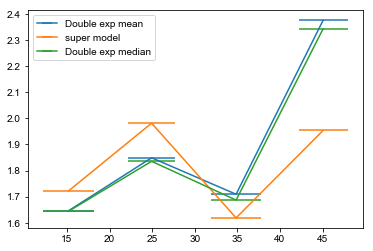

In [17]:

plt.errorbar(Y[4]['e'], Y[4]['chi2_mean'], xerr=Y[4]['de'], label='Double exp mean')
plt.errorbar(Xr['e'], Xr['chi2'], xerr=Xr['de'], label='super model')
plt.errorbar(Y[4]['e'], Y[4]['chi2_median'], xerr=Y[4]['de'], label='Double exp median')

plt.legend()

In [18]:
np.mean(Y[4]['chi2_mean'])


1.8951479129935338

In [19]:
# Actual mean when you take only the value and not mean of mean of mean
np.average([1.374707, 1.657354, 1.456146, 1.859614])

1.5869552499999999

In [20]:
np.mean(Xr['chi2'])

1.8190493822304525

In [21]:
means = []
for y in Y:
    mean = np.mean(y['chi2_mean'])
    median = np.median(y['chi2_median'])
    print('Mean %f, median %f' % (mean, median))
    means.append(mean)

Mean 1.826517, median 1.774852
Mean 2.174400, median 1.798533
Mean 1.880032, median 1.781260
Mean 2.261698, median 2.081815
Mean 1.895148, median 1.761131


In [22]:
np.mean(means)

2.0075591417859409

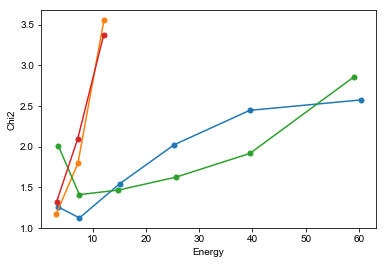

In [23]:
for y in Y[:-1]:
    plt.plot(y['e'], y['chi2_mean'], marker='.', markersize = 10)
plt.xlabel('Energy')
plt.ylabel('Chi2')

### Sigma

In [24]:
plt.style.use('latex_prl')
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['font.size'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

/home/erik/anaconda3/envs/pax_new/lib/python3.4/site-packages/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


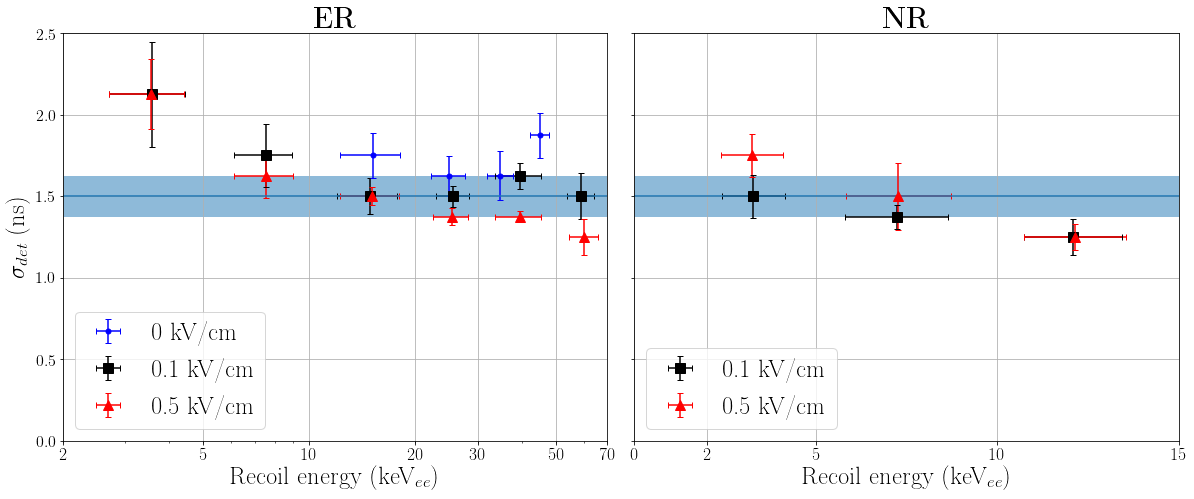

In [31]:
ms = 10 # markersize
cs = 3 # capsize for the error bars
xticks_er = [2, 5, 10, 20, 30, 50, 70]
xticks_nr = [0, 2, 5, 10, 15]

f = plt.figure(figsize=(20,7.5))
gs = gridspec.GridSpec(1, 2, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
axes = [ax0, ax1]
axes_left  = [ax0]
axes_right = [ax1]
# Set grid and x limits

for ax in axes_right:
    # ax.set_xscale('log')
    ax.grid()
    ax.set_xlim(0, 15)
    ax.set_xticks(xticks_nr)
    ax.set_xticklabels([str(xtick) for xtick in xticks_nr])
    
    
for ax in axes_left:
    ax.set_xscale('log')
    ax.grid()
    ax.set_xlim(2, 70)
    ax.set_xticks(xticks_er)
    ax.set_xticklabels([str(xtick) for xtick in xticks_er])

for ax in axes_right:
    ax.set_ylabel("")
    ax.set_yticklabels([])

ax0.set_ylabel(r"$\sigma_{det}$ (ns)")    
    
# Plot titles
ax0.set_title(r'\bf ER')
ax1.set_title(r'\bf NR')

# x-axis titles
for ax in [ax0, ax1]:
    ax.set_xlabel('Recoil energy (keV$_{ee}$)')    
    
for x, l, c, marker in zip([X[2], X[0], X[4]], ['0.1 kV/cm', '0.5 kV/cm', '0 kV/cm'], 
                           ['black', 'red', 'blue'], ['s', '^', '.']):
    for ypar, ax in zip(['tts'], [ax0]):
        ax.errorbar(x['e'], xerr = x['de'], y = x[ypar], yerr = (x['d' + ypar + '+'], x['d' + ypar + '-']), 
                     label=l, marker = marker, markersize = ms, ls='None', capsize = cs, color=c)  
        
for x, l, c, marker in zip([X[3], X[1]], ['0.1 kV/cm', '0.5 kV/cm'], ['black', 'red'], ['s', '^']):
    for ypar, ax in zip(['tts'], [ax1]):
        ax.errorbar(x['e'], xerr = x['de'], y = x[ypar], yerr = (x['d' + ypar + '+'], x['d' + ypar + '-']), 
                     label=l, marker = marker, markersize = ms, ls='None', capsize = cs, color=c)  
        
for ax in [ax1]:
    ax.legend(loc='lower left')
    

handles, labels = ax0.get_legend_handles_labels()
plt.sca(ax0)
plt.legend([handles[2], handles[0], handles[1]], [labels[2], labels[0], labels[1]], loc='lower left')

for ax in axes:#[ax0, ax1, ax2, ax3, ax4, ax5]:
    ax.get_xaxis().set_ticklabels([])
    
ax0.set_xticks(xticks_er)
ax0.set_xticklabels([str(xtick) for xtick in xticks_er])

ax1.set_xticks(xticks_nr)
ax1.set_xticklabels([str(xtick) for xtick in xticks_nr])

for ax in axes:
    ax.set_ylim(0, 2.5)
    
    
mid = 1.5
upper = 1.625
lower = 1.375
for ax in axes:
    plt.sca(ax)
    plt.axhline(mid, lw=1.5)
    plt.fill_between((0, 70), (lower, lower), (upper, upper), alpha = 0.5)

    
plt.savefig('/home/erik/win/notes/fig8.pdf', bbox_inches='tight')

### Exp fit

In [32]:
plt.style.use('latex_prl')
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['font.size'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

/home/erik/anaconda3/envs/pax_new/lib/python3.4/site-packages/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


In [33]:
%run 07_LET.ipynb

In [34]:
def draw_box(x, y, **kwargs):
    """Draw rectangle, given x-y boundary tuples"""
    plt.gca().add_patch(matplotlib.patches.Rectangle(
        (x[0], y[0]), x[1] - x[0], y[1] - y[0], **kwargs))

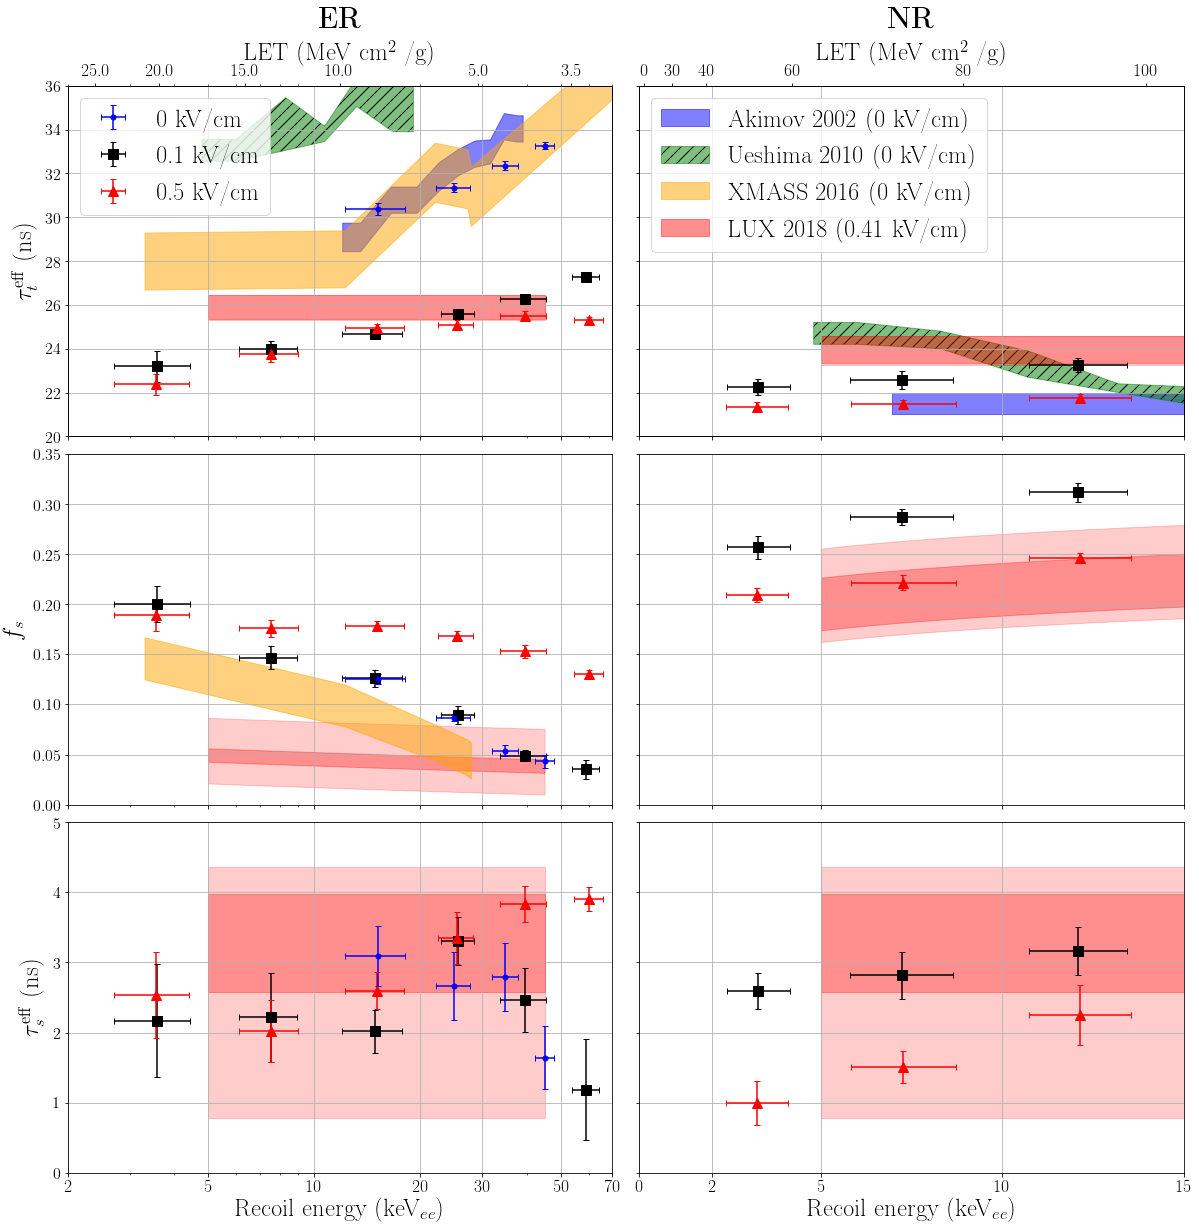

In [36]:
save_it = True
ms = 10 # markersize
cs = 3 # capsize for the error bars
xticks_er = [2, 5, 10, 20, 30, 50, 70]
xticks_nr = [0, 2, 5, 10, 15]

f = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(3, 2, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])
ax4 = plt.subplot(gs[4])
ax5 = plt.subplot(gs[5])

axes = [ax0, ax1, ax2, ax3, ax4, ax5]
axes_left  = [ax0, ax2, ax4]
axes_right = [ax1, ax3, ax5]
# Set grid and x limits

for ax in axes_right:
    # ax.set_xscale('log')
    ax.grid()
    ax.set_xlim(0, 15)
    ax.set_xticks(xticks_nr)
    ax.set_xticklabels([str(xtick) for xtick in xticks_nr])
    
    
for ax in axes_left:
    ax.set_xscale('log')
    ax.grid()
    ax.set_xlim(2, 70)
    ax.set_xticks(xticks_er)
    ax.set_xticklabels([str(xtick) for xtick in xticks_er])



# Plot titles
ax0.set_title(r'{\bf ER}', y=1.15)
ax1.set_title(r'{\bf NR}', y=1.15)

# x-axis titles
for ax in [ax4, ax5]:
    ax.set_xlabel('Recoil energy (keV$_{ee}$)')
    


# Turn off y-axis ticks for 
for ax in axes_right:
    ax.set_ylabel("")
    ax.set_yticklabels([])

ax0.set_ylabel(r"$\tau_{t}^{\rm eff}$ (ns)")
ax2.set_ylabel(r'$f_s$')
ax4.set_ylabel(r"$\tau_{s}^{\rm eff}$ (ns)")

for x, l, c, marker in zip([Y[2], Y[0], Y[4]], ['0.1 kV/cm', '0.5 kV/cm', '0 kV/cm'], 
                           ['black', 'red', 'blue'], ['s', '^', '.']):
    for ypar, ax in zip(['t3', 'fs', 't1'], [ax0, ax2, ax4]):
        ax.errorbar(x['e'], xerr = x['de'], y = x[ypar + '_value'],  yerr = (x['d' + ypar + '+'], x['d' + ypar + '-']), 
                     label=l, marker = marker, markersize = ms, ls='None', capsize = cs, color=c)  
        
for x, l, c, marker in zip([Y[3], Y[1]], ['0.1 kV/cm', '0.5 kV/cm'], ['black', 'red'], ['s', '^']):
    for ypar, ax in zip(['t3', 'fs', 't1'], [ax1, ax3, ax5]):
        ax.errorbar(x['e'], xerr = x['de'], y = x[ypar + '_value'],  yerr = (x['d' + ypar + '+'], x['d' + ypar + '-']), 
                    # label=l, 
                    marker = marker, markersize = ms, ls='None', capsize = cs, color=c)  

for ax in [ax0, ax1]:
    # t3
    ax.set_ylim(20, 36)
for ax in [ax2, ax3]:
    # fs
    ax.set_ylim(0, 0.35)
for ax in [ax4, ax5]:
    # t1
    ax.set_ylim(0., 5)
    
# for ax in [ax0]:
#     ax.legend(loc='upper left')
handles, labels = ax0.get_legend_handles_labels()
plt.sca(ax0)
plt.legend([handles[2], handles[0], handles[1]], [labels[2], labels[0], labels[1]], loc='upper left')
    
for ax in axes:
    ax.get_xaxis().set_ticklabels([])
    
ax4.set_xticks(xticks_er)
ax4.set_xticklabels([str(xtick) for xtick in xticks_er])

ax5.set_xticks(xticks_nr)
ax5.set_xticklabels([str(xtick) for xtick in xticks_nr])
l
plt.sca(ax0)
# Akimov points ER
asim_x_plot = np.concatenate([[asim_x[0] - asim_dx[0]], asim_x, [asim_x[-1] + asim_dx[-1]]])
asim_y_plot = np.concatenate([[asim_y[0]], asim_y, [asim_y[-1]]])
asim_dy_plot = np.concatenate([[asim_dy[0]], asim_dy, [asim_dy[-1]]])
plt.fill_between(asim_x_plot, asim_y_plot - asim_dy_plot, asim_y_plot + asim_dy_plot, color='blue', alpha=0.5)

# Ueshima points ER
ues_x_plot = np.concatenate([[ueser_x[0] - ueser_dx[0]], ueser_x, [ueser_x[-1] + ueser_dx[-1]]])
ues_y_plot = np.concatenate([[ueser_y[0]], ueser_y, [ueser_y[-1]]])
ues_dy_plot = np.concatenate([[ueser_dy[0]], ueser_dy, [ueser_dy[-1]]])
plt.fill_between(ues_x_plot, ues_y_plot - ues_dy_plot, ues_y_plot + ues_dy_plot, alpha=0.5, color='green', hatch='//')


plt.sca(ax1)
# Akimov points NR
akim_x_nr = np.array([6.95, 7.3, 8.0, 14.1, 14.2, 15.0])
akim_y_nr = np.array([20.3, 21.4, 21.1, 21.2, 20.6, 21.4])
akim_dy_nr = np.array([1.2 for _y in akim_y_nr])
plt.fill_between([akim_x_nr[0], akim_x_nr[-1]], [21.5 - 0.5, 21.5-0.5], [21.5 + 0.5, 21.5 + 0.5], 
                 color='blue', alpha=0.5, label=r'Akimov 2002 (0 kV/cm)')

# Ueshima points NR
ues_x_plot = np.concatenate([[uesnr_x[0] - uesnr_dx[0]], uesnr_x, [uesnr_x[-1] + uesnr_dx[-1]]])
ues_y_plot = np.concatenate([[uesnr_y[0]], uesnr_y, [uesnr_y[-1]]])
ues_dy_plot = np.concatenate([[uesnr_dy[0]], uesnr_dy, [uesnr_dy[-1]]])
plt.fill_between(ues_x_plot, ues_y_plot - ues_dy_plot, ues_y_plot + ues_dy_plot, alpha=0.5, color='green', hatch='//',
                 label=r'Ueshima 2010 (0 kV/cm)')


# Draw fake box to build legend
plt.sca(ax1)
xmass_style = dict(color='orange', alpha = 0.5)
plt.fill_between((-1, -0.5), (-1, -0.5), label = 'XMASS 2016 (0 kV/cm)', **xmass_style)
plt.fill_between((-1, -0.5), (-1, -0.5), color='red', alpha = (1- 0.8 * 0.7), label='LUX 2018 (0.41 kV/cm)')
handles, labels = ax1.get_legend_handles_labels()
plt.legend(handles[:4], labels[:4], loc='upper left')

# LUX data
def draw_lux_full(axis, band, parameter, bestfit, stat, syst1, syst2):
    lux_style = dict(color = 'red', alpha = 0.2)
    lux_style_noopt = dict(color = 'red', alpha = 0.3)
    lux_line = dict(color='red')

    if band == 'er':
        e_bounds = (lux_er_e_min, lux_er_e_max)
    elif band == 'nr':
        e_bounds = (lux_nr_e_min, lux_nr_e_max)
    
    plt.sca(axis)
    # First do the full uncertainty
    minvalue, value, maxvalue = get_parameter_range(bestfit, stat, syst1, syst2)
    if parameter == 'fs':
        minvalue = c1c3_to_fs(minvalue)
        value = c1c3_to_fs(value)
        maxvalue = c1c3_to_fs(maxvalue)
    if parameter is not 'fs':    
        draw_box(e_bounds, (minvalue, maxvalue), **lux_style)
    # Now neglect opt
    minvalue, value, maxvalue = get_parameter_range(bestfit, stat, syst1, (0, 0))
#     if parameter == 'fs':
#         minvalue = c1c3_to_fs(minvalue)
#         value = c1c3_to_fs(value)
#         maxvalue = c1c3_to_fs(maxvalue)
    if parameter is not 'fs':
        draw_box(e_bounds, (minvalue, maxvalue), **lux_style_noopt)
        # plt.plot(e_bounds, (value, value), **lux_line)
    if parameter == 'fs':
        if band == 'er':
            alpha = 0.063
            beta = -0.12
            xplot = np.linspace(*e_bounds, num=50)
            yplot = alpha * xplot**beta
        if band == 'nr':
            alpha = 0.15
            beta = 0.15
            xplot = np.linspace(*e_bounds, num=50)
            nr_e = keVee_to_keV(xplot)
            yplot = alpha * nr_e**beta
        yplot = c1c3_to_fs(yplot)
        #plt.plot(xplot, yplot, **lux_line)
        for _syst2, style in zip([(0, 0), syst2], [lux_style_noopt, lux_style]):
            minvalue, value, maxvalue = get_parameter_range(bestfit, stat, syst1, _syst2)
            minvalue, value, maxvalue = c1c3_to_fs(np.array([minvalue, value, maxvalue]))
            plt.fill_between(xplot, yplot - (value - minvalue), yplot + (maxvalue - value), **style)
    return

    

draw_lux_full(ax0, 'er', 't3', 25.89, 0.06, 1.9, (0.6, 0.5))
draw_lux_full(ax1, 'er', 't3', 23.97, 0.17, 1.9, (1.1, 0.1))
draw_lux_full(ax2, 'er', 'fs', 0.042, 0.006, 3.1, (66, 75))
draw_lux_full(ax3, 'nr', 'fs', 0.269, 0.034, 3.1, (10, 20))
draw_lux_full(ax4, 'er', 'ts', 3.27, 0.66, 1.0, (70, 11))
draw_lux_full(ax5, 'nr', 'ts', 3.27, 0.66, 1.0, (70, 11))

# XMASS
plt.sca(ax0)
plt.fill_between(xm_e, xm_tt - xm_dtt_low, xm_tt + xm_dtt_high, **xmass_style)

plt.sca(ax2)
plt.fill_between(xm_e[:-1], xm_fs - xm_dfs_low, xm_fs + xm_dfs_high, **xmass_style)

# Top legend
plt.sca(ax0)
plt.twiny()
plt.xlim(2,70)
plt.xscale('log')
plt.xlabel(r'LET (\si{MeV cm^2 /g})')
LET_er_labels = np.array([3.5, 5, 10, 15, 20, 25])
LET_er_positions = LET_er(LET_er_labels, mode='LET_inv')
plt.xticks(LET_er_positions, LET_er_labels)

plt.sca(ax1)
plt.twiny()
plt.xlim(0,15)
plt.xlabel(r'LET (\si{MeV cm^2 /g})')
LET_nr_labels = [0.001, 30, 40, 60, 80, 100]
LET_nr_positions = LET_nr(LET_nr_labels, mode='LET_inv', model='SRIM')
# Convert recoil energy
LET_nr_positions = keV_to_keVee(LET_nr_positions)
# Revert label to zero
LET_nr_labels[0] = 0
plt.xticks(LET_nr_positions, LET_nr_labels)


if save_it:
    plt.savefig('/home/erik/win/notes/fig9.pdf', bbox_inches='tight')
plt.show()

### Recombination

In [23]:
x = x_er_0_rec

In [24]:
keys = ['tr', 'eta', 'f_r', 'fs_r']
for key in keys:
    # Symmetric errors
    #x['d' + key + '+'] = np.sqrt(x['d' + key + '_stat']**2 + x['d' + key + '_syst']**2)
    #x['d' + key + '-'] = np.sqrt(x['d' + key + '_stat']**2 + x['d' + key + '_syst']**2)
    
    # Asymmetric errors
    x['d' + key + '+'] = np.sqrt(
        (x['d' + key + '+_stat'] + x[key + '_median'] - x[key])**2 + 
        (x['d' + key + '_syst'])**2)
    x['d' + key + '-'] = np.sqrt(
        (x['d' + key + '-_stat'] - x[key + '_median'] + x[key])**2 + 
        (x['d' + key + '_syst'])**2)
    
for key in [ 'eta', 'f_r', 'fs_r']  :
    overflow = (x[key] + x['d' + key + '+']) > 1
    if np.any(overflow):
        print('Overflow detected in %s' % key)
        x['d' + key + '+'] = x['d' + key + '+'] * np.invert(overflow) + overflow * (1 - x[key])

Overflow detected in eta


#### Write ascii

In [25]:
fn = '/home/erik/win/notes/fig10_data.txt'
with open(fn, 'w') as f:
    labels = ['e', 'de']

    for par in ['tr', 'eta', 'f_r', 'fs_r']:
        labels.append(par)
        labels.append('d' + par + '+')
        labels.append('d' + par + '-')

    f.write(''.join([l + '\t' for l in labels]) + '\n')
    for i, ding in x.iterrows():
        f.write(''.join(['%.3f\t' % (ding[par]) for par in labels]) + '\n')
    f.write('\n')

In [42]:
plt.style.use('latex_prl')
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['font.size'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

/home/erik/anaconda3/envs/pax_new/lib/python3.4/site-packages/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


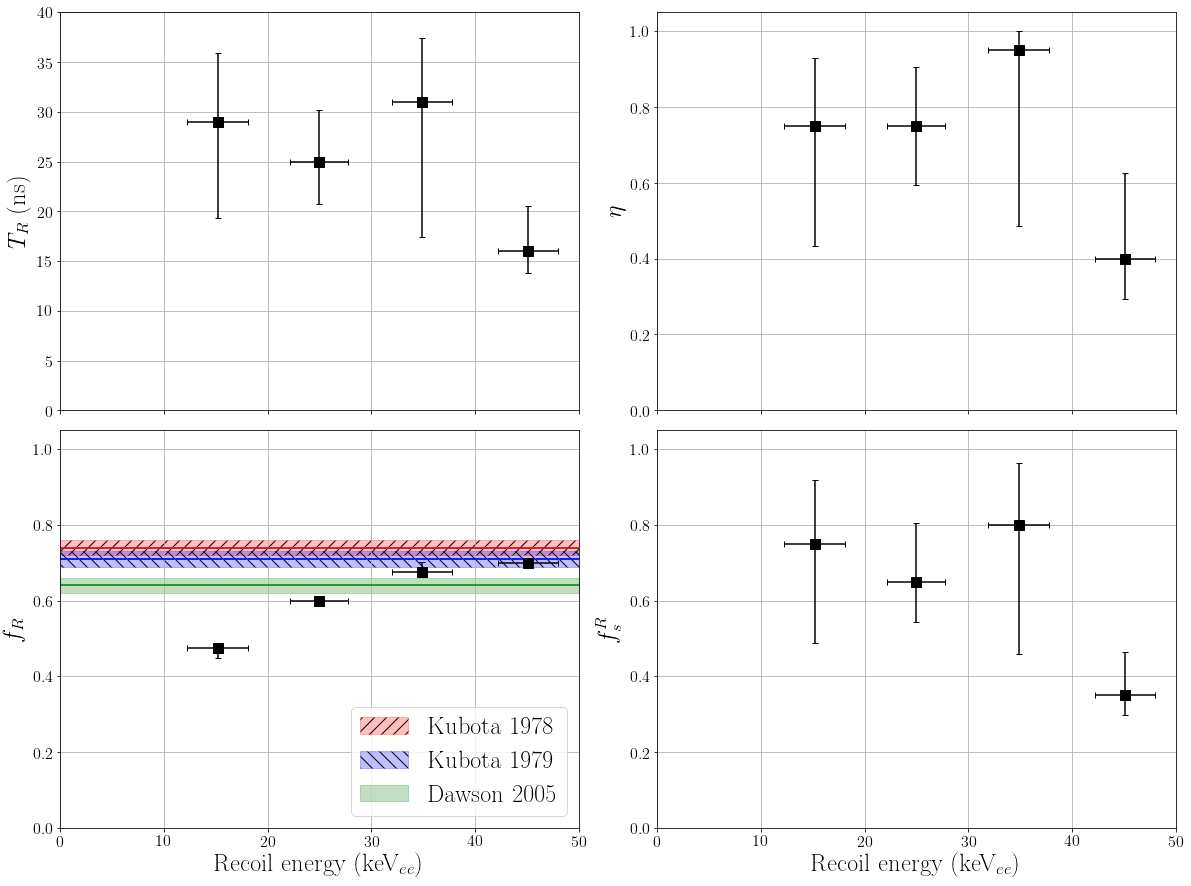

In [44]:
ms = 10 # markersize
cs = 3 # capsize for the error bars

f = plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2, 2, hspace = 0.05, wspace = 0.15) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])
axes = [ax0, ax1, ax2, ax3]

for ax, key in zip(axes, keys):
    ax.errorbar(x['e'], xerr = x['de'], y = x[key], yerr = ( x['d' + key + '-'], x['d' + key + '+']), 
                     marker = 's', markersize = ms, ls='None', capsize = cs, color='black')

ax0.set_ylabel(r'$T_R$ (\si{ns})')
ax1.set_ylabel(r'$\eta$')
ax2.set_ylabel(r'$f_R$')
ax3.set_ylabel(r'$f_{s}^{R}$')

for ax in [ax1, ax2, ax3]:
    ax.set_ylim(0, 1.05)
    
ax0.set_ylim(0, 40)

for ax in axes:
    ax.set_xlim(0, 50)

for ax in [ax0, ax1]:
    ax.get_xaxis().set_ticklabels([])
    
for ax in axes:
    ax.grid()
    
for ax in [ax2, ax3]:
    ax.set_xlabel('Recoil energy (keV$_{ee}$)')
    
# Plots for fR
plt.sca(ax2)
plt.axhline(0.71) # kubota phys rev b 20, 8, 1979
plt.axhline(0.74)# pm 0.02 kubota et al 1978 phys rev b 17, 2762 - 2765
def plot_sigma_band(mu, sig, c, **kwargs):
    plt.axhline(mu, color=c)
    plt.fill_between((0, 50), [mu - sig, mu-sig], [mu+sig, mu+sig], color=c, **kwargs)
    
#plt.axhline(0.64) # pm 0.02 Co60 Dawson et al a study of the scintillation induced by alpha ...
plot_sigma_band(0.74, 0.02, alpha=0.25, label = 'Kubota 1978', c='red', hatch='//', edgecolor='red')
plot_sigma_band(0.71, 0.02, alpha=0.25, label = 'Kubota 1979', c='blue', hatch='\\\\') # Same error because same procedure
plot_sigma_band(0.64, 0.02, alpha=0.25, label='Dawson 2005', c = 'green')

# plt.axhline(0.71, color='blue', label='Kubota 1979')

handles, labels = ax2.get_legend_handles_labels()
# handles = [handles[2], handles[0], handles[1]]
# labels =  [labels[2], labels[0], labels[1]]

plt.legend(handles[:3], labels[:3], loc='lower right')
plt.savefig('/home/erik/win/notes/fig10.pdf', bbox_inches='tight')